#ML-p2 Diabetes

EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(r'/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(768, 9)

Graph

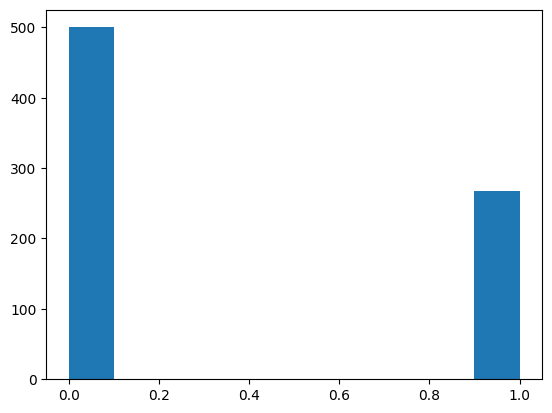

In [ ]:
plt.hist(df["Outcome"])
plt.show()

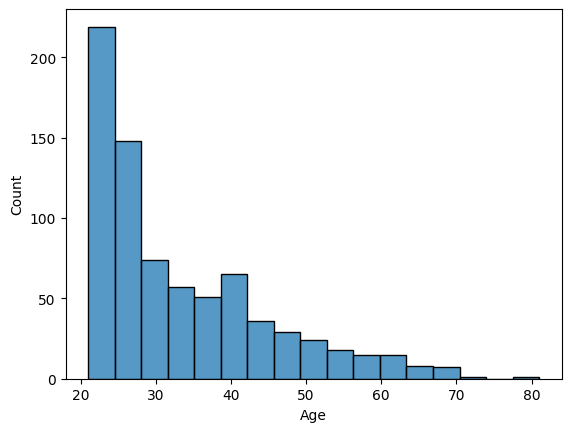

In [ ]:
sns.histplot(df['Age'], kde=False)
plt.show()

COrrelation analysis

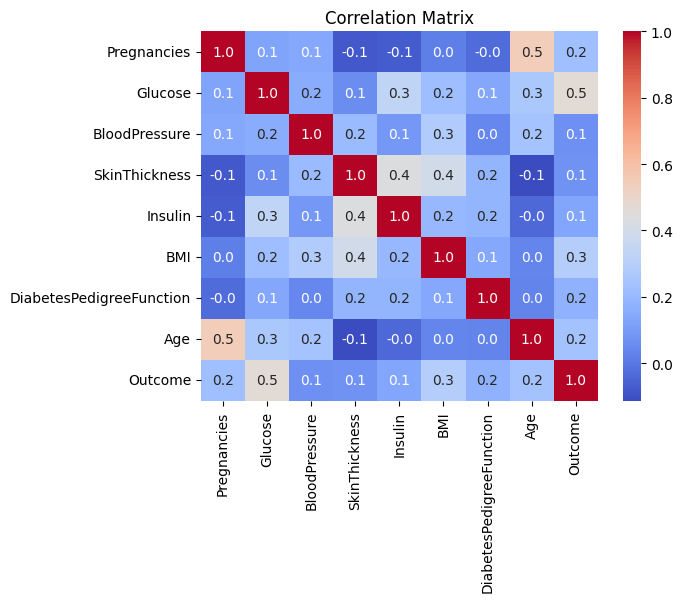

In [ ]:
#Correlation matrix
corr_matrix = df.corr()

#Heatmap
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm') # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

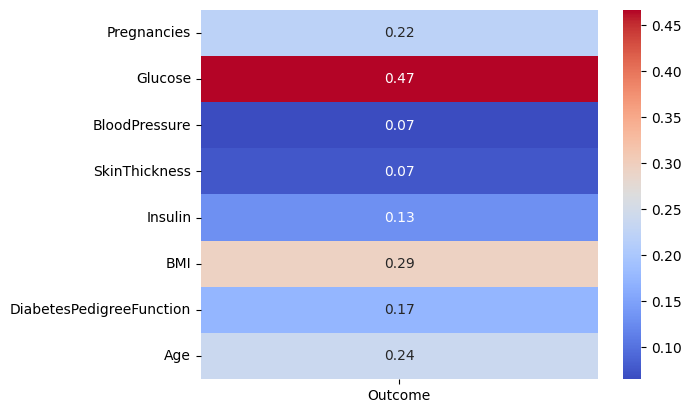

In [ ]:
# Calculate the correlation between 'Outcome' other columns
outcome_corr = df.corr()['Outcome']

outcome_corr = outcome_corr.drop('Outcome')


sns.heatmap(outcome_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, annot_kws={'size': 10})
plt.show()

In [ ]:
df.drop(["BloodPressure","SkinThickness"],axis=1,inplace=True)

<Axes: >

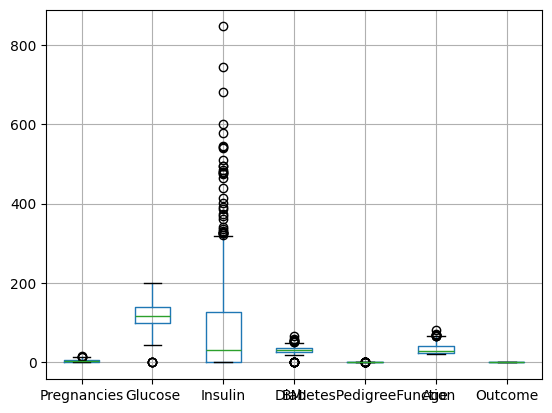

In [ ]:
#Outliers
df.boxplot()

In [ ]:
df.shape

(768, 7)

In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:

        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='Outcome')
df=df_cleaned

In [ ]:
df.shape

(665, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features= ['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df[features])
scaled_df=pd.DataFrame(scaled_data,columns=features)

In [ ]:
from sklearn.linear_model import LogisticRegression

X=df[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']

model=LogisticRegression()
model.fit(X,y)

predicted_class=model.predict([[1,85,0,26.6,0.351,31]])
print(predicted_class)

[0]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7964071856287425

Decision tree algorithm

In [ ]:
#Decision Tree
import pandas as pd
df
target=df["Outcome"]
target

inputs=df.drop(["Outcome"],axis="columns")
inputs



,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
5,5,116,0,25.6,0.201,30
...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63
764,2,122,0,36.8,0.340,27
765,5,121,112,26.2,0.245,30
766,1,126,0,30.1,0.349,47


In [ ]:
#['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:
from sklearn.preprocessing import LabelEncoder
la_df=LabelEncoder()
preg_l=la_df.fit_transform(inputs["Pregnancies"])
glu_l=la_df.fit_transform(inputs["Glucose"])
ins_l=la_df.fit_transform(inputs["Insulin"])
bm_l=la_df.fit_transform(inputs["BMI"])
dpf_l=la_df.fit_transform(inputs["DiabetesPedigreeFunction"])
age_l=la_df.fit_transform(inputs["Age"])


In [ ]:
inputs['Pregnancies']=preg_l
inputs['Glucose']=glu_l
inputs['Insulin']=ins_l
inputs['BMI']=bm_l
inputs['DiabetesPedigreeFunction']=dpf_l
inputs['Age']=age_l

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(inputs,target)
model.score(inputs,target)

1.0

In [ ]:
model.predict([[6,148,0,33.6,0.627,50]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

SVM

In [ ]:
y=df['Outcome']
x=df.drop(["Outcome"],axis="columns")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [ ]:
model=SVC()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.7844311377245509

In [ ]:
model.predict(xtest)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
ytest

,Outcome
491,0
119,0
737,0
198,1
733,0
...,...
518,0
539,1
93,1
512,0


In [ ]:
#linear kernal
svclassifier = SVC(kernel="linear")
svclassifier.fit(xtrain, ytrain)
svclassifier.score(xtest, ytest)

0.7784431137724551

In [ ]:
#polynomial kernal
svclassifier_2 = SVC(kernel='poly', degree=8)
svclassifier_2.fit(xtrain, ytrain)
svclassifier_2.score(xtest, ytest)

0.7425149700598802

In [ ]:
#Gaussian Kernel
Gau_fier = SVC(kernel ='rbf', random_state = 0)
Gau_fier.fit(xtrain, ytrain)
Gau_fier.score(xtest, ytest)



0.7844311377245509

In [ ]:
#Sigmoid Kernel
sig_fier = SVC(kernel ='sigmoid')
sig_fier.fit(xtrain, ytrain)
sig_fier.score(xtest, ytest)

0.49101796407185627

Random Forest

In [ ]:
y=df['Outcome']
x=df.drop(["Outcome"],axis="columns")

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.7724550898203593

In [ ]:
model.predict(xtest.head())

array([0, 1, 0, 0, 0])

In [ ]:
ytest.head()

,Outcome
118,0
22,1
556,0
104,0
694,0


In [ ]:
#confusion matrix
ytrue=ytest
yprdt=model.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytrue,yprdt)
cm

array([[89, 14],
       [24, 40]])

<Axes: >

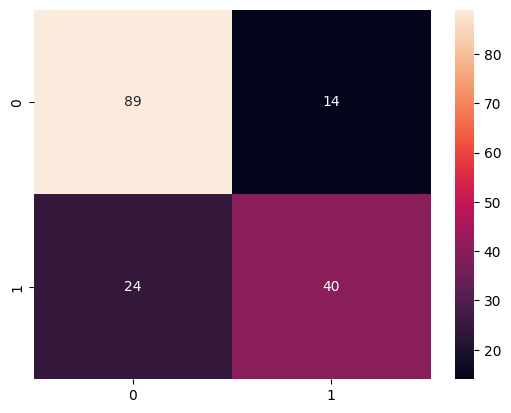

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True)